# Tutorial: `quasip` Function

The `quasip` function simulates a dynamical system based on a set of parameters. It explores different behaviors of the system under various conditions.

## Parameters

- **Map** (int): Determines the type of system to simulate. Set to `0` for differential equation mode, `1` for map mode.
- **alpha**, **beta**, **gamma** (float): Parameters influencing the system's behavior in differential equation mode.
- **A**, **B** (float): Amplitude parameters used in the differential equation.
- **Omega** (float): Frequency parameter for the system.
- **Picture** (int): Determines the type of plot. `1` for a 1D map, `2` for theta_dot vs theta, and `3` for a 2D torus plot.
- **k**, **b** (float): Parameters used in map mode. k = coupling constant   

## Returns

- **Pendulum** (list of tuples): Contains positions (b1, b2) for plotting the pendulum's orientation.
- **Circle_map** (list of tuples): Contains positions for plotting the 1D map if `Picture == 1`.
- **Theta_dot** (list of tuples): Contains positions for plotting theta_dot vs theta if `Picture == 2`.
- **Torus** (list of tuples): Contains line segments for the 2D torus plot if `Picture == 3`.


## Example
Pendulum, Circle_map, Theta_dot, Torus = `quasip_test` (Map, alpha, beta, gamma, A, B, Omega, Picture, k, b)


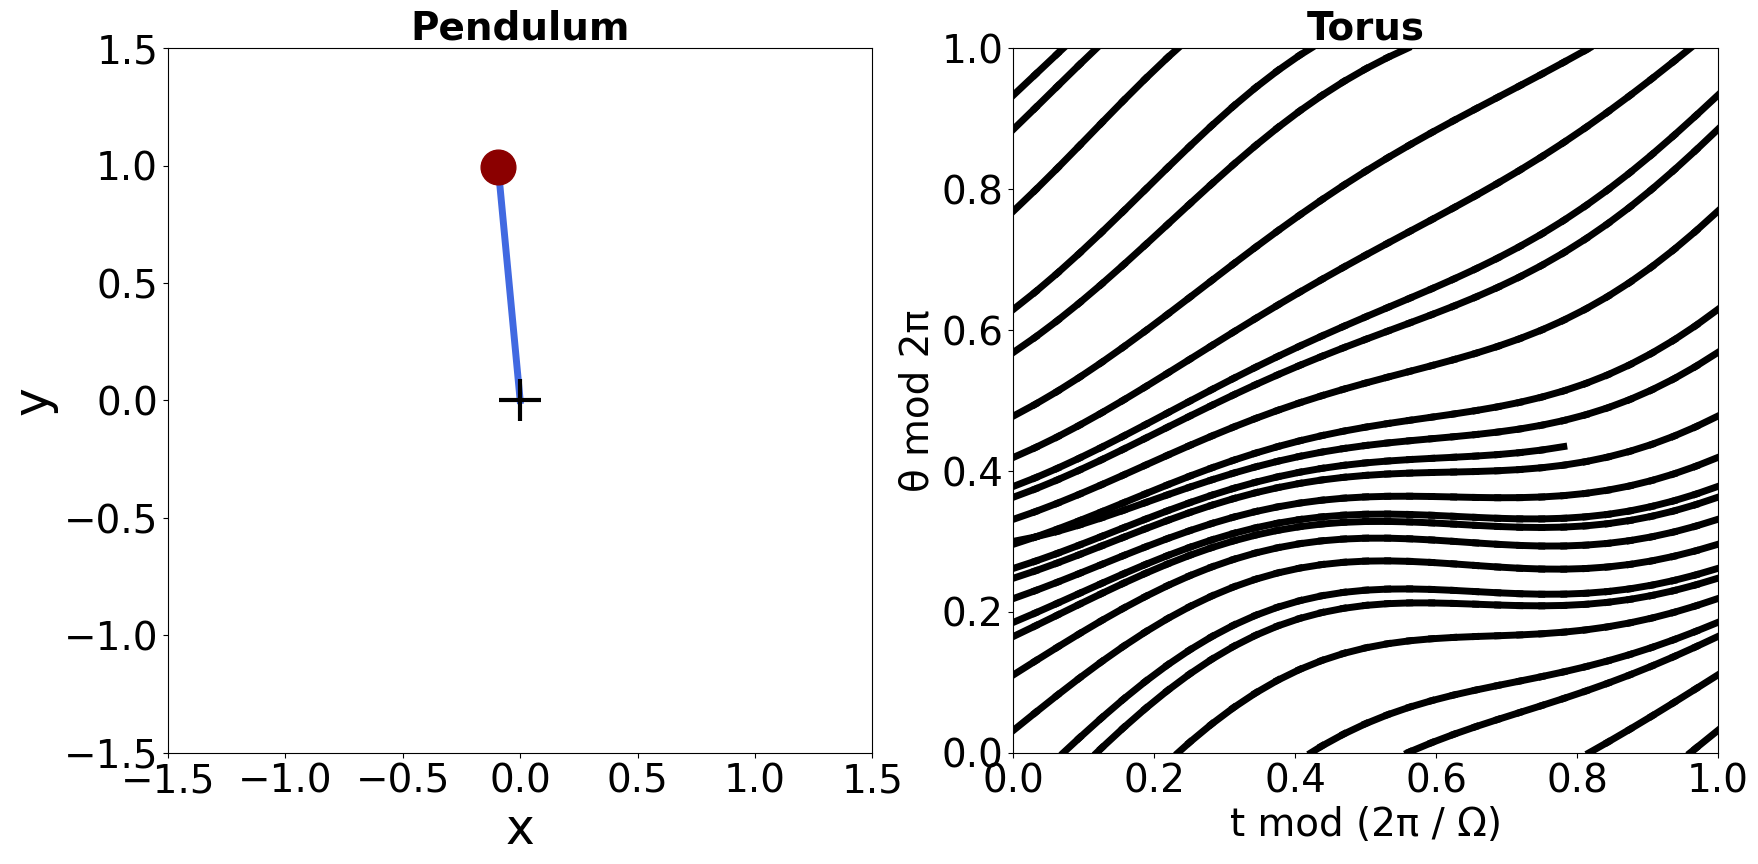

In [4]:
# Define parameters
from QUASIP_functions import quasip_test, quasip_anim
import numpy as np

# Define parameters
Map = 0
alpha = 1
beta = 1.576
gamma = 1
A = 1.4
B = 1
Omega = 1.76 #0.292 #1.76
Picture = 3 # 1 Circle, 2 Theta_dot, 3 Torus
k = 1
b = 0.25

# Call the function with the parameters
Pendulum, Circle_map, Theta_dot, Torus = quasip_test(Map, alpha, beta, gamma, A, B, Omega, Picture, k, b)

quasip_anim(Pendulum, Circle_map, Theta_dot, Torus, Map, Picture)

